In [1]:
## This command shows each cell take howmuch time to execute
#!pip install ipython-autotime
%load_ext autotime

time: 0 ns (started: 2021-03-22 10:00:18 +05:30)


## Download Images using bing-downloader

In [2]:
## For Image-Classification scrapping the images using python libraries

!pip install bing-image-downloader

time: 3.23 s (started: 2021-03-20 10:45:14 +05:30)


In [3]:
## to make directory use
## !mkdir images

time: 0 ns (started: 2021-03-20 10:45:18 +05:30)


In [4]:
## download images automatically from bing in our specific directory
from bing_image_downloader import downloader
downloader.download("pretty sunflower",limit=30,output_dir='images',
                   adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://weneedfun.com/wp-content/uploads/2016/10/SunFlowers-Wallpapers-7.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://i.pinimg.com/736x/39/01/7c/39017c4ea1158ba7a7981cde8c86159e.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://68.media.tumblr.com/0e7c51707ae0ff9a8d9875611d128cd0/tumblr_oesdulfK4A1u8c42ao1_500.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.pinimg.com/736x/be/01/10/be0110aad0893a1710675bf35e822198.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/736x/93/59/bf/9359bf664b712ad76b217ba2bf43448c.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://24.media.tumblr.com/tumblr_m62rnbWYCG1r7pl96o1_500.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.wallpapers13.com/wp-content/uploads/2015/12/Sunflower-flower-close-up-high-definition-2560X1600-1600x1200.jpg
[%] File Downloaded 

In [5]:
downloader.download("rugby ball leather",limit=30,output_dir='images',
                   adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 11 Images on Page 1.


[%] Downloading Image #1 from https://upload.wikimedia.org/wikipedia/commons/3/35/Richard_Lindon_(1816-1887).jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://cdn.shopify.com/s/files/1/0788/5979/products/mvp-leather-balls-executive-leather-32p-soccer-ball-2_1024x1024.jpg?v=1548126529
[%] File Downloaded !

[%] Downloading Image #3 from http://www.campoly.com/files/3014/8614/0115/2footballs.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://images.antiquesatlas.com/dealer-stock-images/puckeringsantiques/Antique_Novelty_Travel_Inkwell_as584a1568z-1.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://static.vecteezy.com/system/resources/previews/000/104/890/original/football-texture-background-vector.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.bigw.com.au/medias/sys_master/images/images/hf7/hfc/15133025107998.jpg
[%] File Downloaded !

[%] Downloading Image #7 from h

In [6]:
downloader.download("ice cream cone",limit=30,output_dir='images',
                   adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from https://c8.alamy.com/comp/BXJ7WF/little-girl-eating-a-chocolate-ice-cream-cone-and-getting-most-of-BXJ7WF.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://sweettreatstruck.com/wp-content/uploads/2014/09/nestle-bar-crunch.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://i.pinimg.com/736x/bc/f2/30/bcf230d4d19d84100f95dfa77183fc40--tied-shirt-brooke-shields.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://i.ytimg.com/vi/2H8p2Dxpu_s/maxresdefault.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://static.standard.co.uk/s3fs-public/thumbnails/image/2018/06/26/15/quirky-ice-creams-bake.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.bakedbeauties.co.uk/wp-content/uploads/2017/04/IMG_0149-e1493574104203.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://thecuddl.com/images/2018/04/21-cute-party-ideas-thecuddl.j

## Data Preprocessing

 1. Resize
 2. Flatten

In [2]:
import os  ##used to many directories
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

time: 18.7 s (started: 2021-03-22 10:00:28 +05:30)


In [3]:
target = []
images = []
flat_data = []

DATADIR = '../Image_Classification/images'
CATEGORIES = ['pretty sunflower','rugby ball leather','ice cream cone']

for category in CATEGORIES:
    class_num = CATEGORIES.index(category) 
    path = os.path.join(DATADIR, category) 
    for img in os.listdir(path):
        img_array = imread(os.path.join(path,img))
        img_resized = resize(img_array,(150,150,3)) #Normalizes the values to 0-1
        flat_data.append(img_resized.flatten())
        images.append(img_resized)
        target.append(class_num)
        
flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 54.7 s (started: 2021-03-22 10:00:48 +05:30)


<BarContainer object of 3 artists>

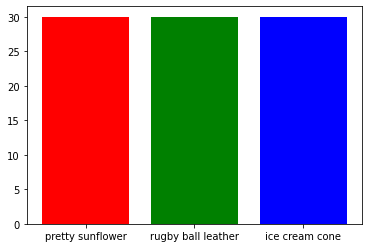

time: 500 ms (started: 2021-03-22 10:01:42 +05:30)


In [4]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count,color = ['red','green','blue'])

In [40]:
##split data into train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(flat_data,target,
                                                 test_size = 0.3,
                                                 random_state = 100)

time: 31 ms (started: 2021-03-21 17:43:06 +05:30)


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
    {'C':[1,10,100,1000],'kernel':['linear']},
    {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(X_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])

time: 1min 34s (started: 2021-03-21 17:43:06 +05:30)


In [42]:
y_pred = clf.predict(X_test)

time: 125 ms (started: 2021-03-21 17:45:54 +05:30)


In [43]:
y_pred

array([1, 2, 0, 0, 1, 1, 1, 1, 1, 2, 0, 1, 0, 2, 0, 2, 1, 2, 2, 2, 0, 0,
       1, 0, 1, 0, 0])

time: 0 ns (started: 2021-03-21 17:45:55 +05:30)


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_pred,y_test)

0.9259259259259259

time: 16 ms (started: 2021-03-21 17:45:56 +05:30)


In [45]:
confusion_matrix(y_pred,y_test)

array([[10,  0,  0],
       [ 2,  8,  0],
       [ 0,  0,  7]], dtype=int64)

time: 15 ms (started: 2021-03-21 17:45:56 +05:30)


In [46]:
# Save the model using pickle

import pickle

pickle.dump(clf,open('image_model.p','wb'))

time: 125 ms (started: 2021-03-21 17:45:57 +05:30)


In [47]:
model = pickle.load(open('image_model.p','rb'))

time: 15 ms (started: 2021-03-21 17:45:58 +05:30)


Enter your URL: https://i.pinimg.com/originals/dd/95/f9/dd95f9fb2c492c6de4f8da9b59b1973d.jpg
(1709, 1200, 3)
PREDICTED OUTPUT: pretty sunflower


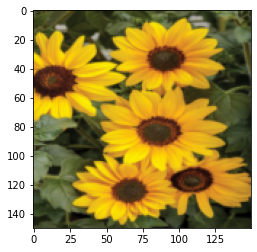

time: 59.4 s (started: 2021-03-21 17:45:59 +05:30)


In [48]:
# Testing a new image
flat_data = []
url = input('Enter your URL: ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')

In [32]:
## for deployment the model
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok

  Using cached blinker-1.4.tar.gz (111 kB)
  Using cached astor-0.8.1-py2.py3-none-any.whl (27 kB)
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13455 sha256=943b6455724910ff254d79069a738551c75b00b224248d6b4befa6eddca1609c
  Stored in directory: c:\users\aayushi\appdata\local\pip\cache\wheels\b7\a5\68\fe632054a5eadd531c7a49d740c50eb6adfbeca822b4eab8d4
Successfully built blinker


  Created wheel for pyngrok: filename=pyngrok-5.0.4-py3-none-any.whl size=18976 sha256=7b50067e90cc5222affcceab07c3516ce3da9d833dab5ed7b2f2647429806aba
  Stored in directory: c:\users\aayushi\appdata\local\pip\cache\wheels\67\91\24\789f25775c628b2a27b03fde33118b500d78ae2164e124c990
Successfully built pyngrok
time: 1min 24s (started: 2021-03-21 17:10:05 +05:30)


In [ ]:
## create streamlit application to build webapp

In [49]:
%%writefile app.py 

import streamlit as st
st.title("Image Classifier")

Overwriting app.py
time: 16 ms (started: 2021-03-21 17:47:08 +05:30)


In [53]:
!nohup streamlit run app.py

url = ngrok.connect(port='80')
url

'nohup' is not recognized as an internal or external command,
operable program or batch file.
t=2021-03-21T17:49:10+0530 lvl=warn msg="failed to start tunnel" pg=/api/tunnels id=b2014201030090ff err="Your account may not run more than 2 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\n[]\n\r\n\r\nERR_NGROK_324\r\n"


PyngrokNgrokHTTPError: ngrok client exception, API returned 502: {"error_code":103,"status_code":502,"msg":"failed to start tunnel","details":{"err":"Your account may not run more than 2 tunnels over a single ngrok client session.\nThe tunnels already running on this session are:\n[]\n\r\n\r\nERR_NGROK_324\r\n"}}


time: 1.14 s (started: 2021-03-21 17:49:09 +05:30)
